In [1]:
import torch
import itertools
import matplotlib.pyplot as plt

In [2]:
X = torch.tensor(list(itertools.product([0,1],repeat=6)),dtype=torch.float32)

In [3]:
def is_symm(x):
    return 1 if x[2] == x[3] and x[1] == x[4] and x[0] == x[5] else 0

In [4]:
Y = torch.tensor([is_symm(x) for x in X], dtype=torch.float32)

In [5]:
class BinaryCLassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features = 6, out_features = 2, bias = True)
        self.layer2 = torch.nn.Linear(in_features = 2, out_features = 1, bias = True)
        self.activation = torch.nn.Sigmoid()
    
    def forward(self,x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        return x
    
model = BinaryCLassifier()

In [6]:
def get_accuracy(model, X, Y):
    model.eval()
    with torch.no_grad():
        correct=0
        out=model(X)
        correct+=(out == Y).float().sum()
        return correct/len(X)

get_accuracy(model,X,Y)

tensor(0.)

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
loss=torch.nn.MSELoss()

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

Text(0, 0.5, 'CE Loss')

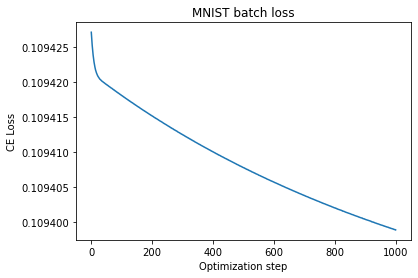

In [11]:
epochs=1000
losses=[]
for epoch in range(epochs):
    model.train()
    print("Epoch: ", epoch)
    out=model(X)
    l=loss(out, Y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    losses.append(l.item())
print("Final accuracy: ", get_accuracy(model, X, Y))

plt.figure()
plt.title("MNIST batch loss")
plt.plot(losses)
plt.xlabel("Optimization step")
plt.ylabel("CE Loss")

In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

layer1.weight tensor([[-0.2285, -0.1814, -0.2081,  0.1457, -0.2485,  0.2688],
        [ 0.2319, -0.3850, -0.0363,  0.2121, -0.3805,  0.2452]])
layer1.bias tensor([-0.0987, -0.2242])
layer2.weight tensor([[-0.8062,  0.1663]])
layer2.bias tensor([-1.6797])
